# Problem
## Kaggle: IBM Attrition
What factors lead to employee attrition?

We explore important questions related to our data, such as:

* The breakdown of distance from home by job role and attrition.
* Comparison of average monthly income by education and attrition.

# Data Collection 

In [2]:
# import standard packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and overview

Employee = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Exploration

In [4]:
Employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Visualization

## a). Average distance from home by job role and attrition.

In [5]:
# breakdown of distance from home by job role and attrition.

df_distance = Employee.groupby(["JobRole", "Attrition"])["DistanceFromHome"].mean().reset_index()
df_distance

,JobRole,Attrition,DistanceFromHome
0,Healthcare Representative,No,9.204918
1,Healthcare Representative,Yes,17.666667
2,Human Resources,No,6.600000
3,Human Resources,Yes,13.416667
4,Laboratory Technician,No,9.329949
5,Laboratory Technician,Yes,9.661290
6,Manager,No,7.927835
7,Manager,Yes,10.000000
8,Manufacturing Director,No,9.533333
9,Manufacturing Director,Yes,8.800000


Text(0.5, 1.0, 'Avg distance by Job role and Attrition')

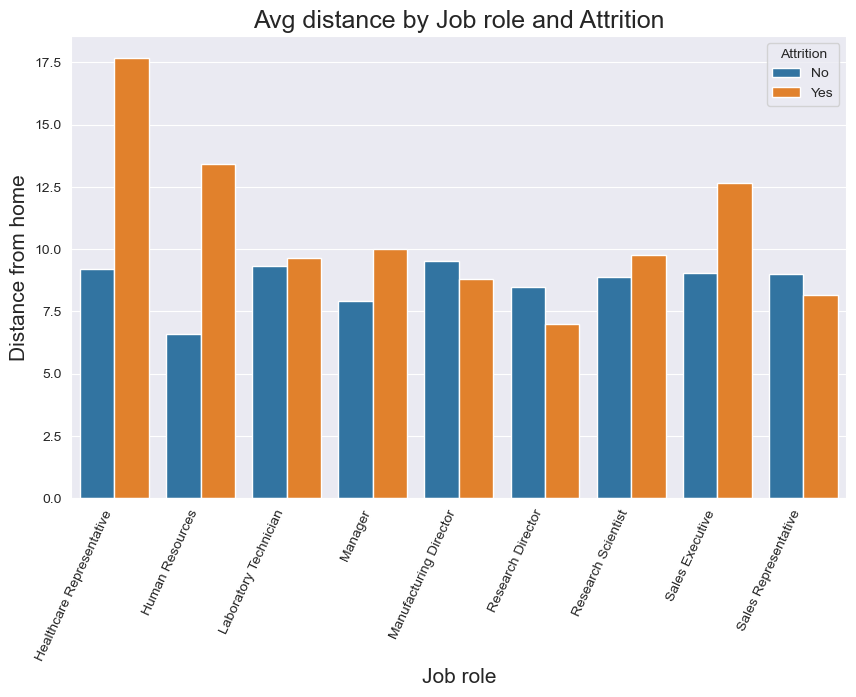

In [8]:
plt.figure(figsize=(10,6))

# set style
sns.set_style('darkgrid')

# make barplot
sns.barplot(x="JobRole", y="DistanceFromHome", hue="Attrition", data=df_distance)

# set labels
plt.xlabel("Job role", size=15)
plt.ylabel("Distance from home", size=15)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title("Avg distance by Job role and Attrition", size=18)

## b). Average monthly income by education and attrition.

In [9]:
# Comparison of average monthly income by education and attrition.

df_AvgMonthlyIncome = Employee.groupby(["Education", "Attrition"])["MonthlyIncome"].mean().reset_index()
df_AvgMonthlyIncome

,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662
5,3,Yes,4770.242424
6,4,No,7087.814706
7,4,Yes,5335.155172
8,5,No,8559.906977
9,5,Yes,5850.200000


Text(0.5, 1.0, 'Avg Monthly income by Education and Attrition')

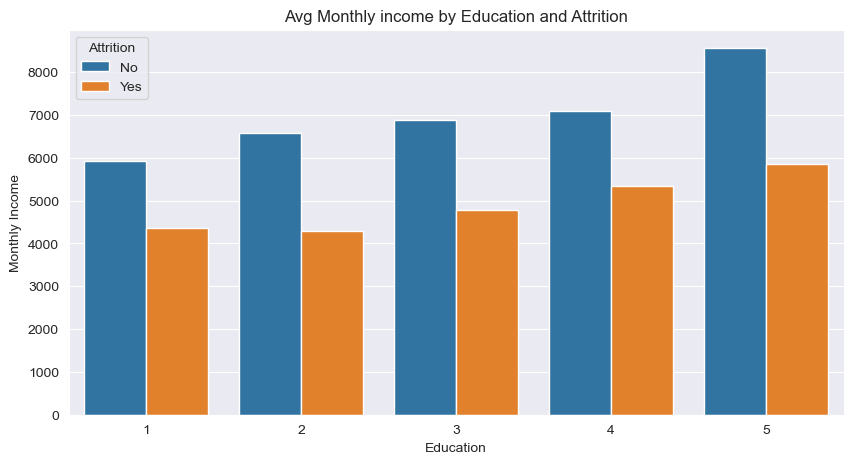

In [11]:
plt.figure(figsize=(10,5))

# make barplot
sns.barplot(x="Education", y="MonthlyIncome", hue="Attrition", data=df_AvgMonthlyIncome)

# set labels
plt.xlabel("Education")
plt.ylabel("Monthly Income")
plt.title("Avg Monthly income by Education and Attrition")